In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_excel("Data_Train.xlsx")
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
test=pd.read_excel("Test_set.xlsx")
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
data=train.append(test)

In [5]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [6]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [7]:
data.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

In [8]:
data.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [9]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [10]:
data["Date"]=data["Date_of_Journey"].str.split("/").str[0]
data["Month"]=data["Date_of_Journey"].str.split("/").str[1]
data["Year"]=data["Date_of_Journey"].str.split("/").str[2]

In [11]:
data=data.drop(["Date_of_Journey"],axis=1)

In [12]:
data["Date"]=data["Date"].astype(int)
data["Month"]=data["Month"].astype(int)
data["Year"]=data["Year"].astype(int)

In [13]:
data["Route1"]=data["Route"].str.split("→ ").str[0]
data["Route2"]=data["Route"].str.split("→ ").str[1]
data["Route3"]=data["Route"].str.split("→ ").str[2]
data["Route4"]=data["Route"].str.split("→ ").str[3]
data["Route5"]=data["Route"].str.split("→ ").str[4]

In [14]:
data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,BLR,NAG,DEL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,6,6,2019,CCU,DEL,BLR,NaN,NaN
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,27,3,2019,CCU,BLR,NaN,NaN,NaN
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,6,3,2019,DEL,BOM,COK,NaN,NaN
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,6,3,2019,DEL,BOM,COK,NaN,NaN


In [15]:
data["Route1"].fillna("None",inplace=True)
data["Route2"].fillna("None",inplace=True)
data["Route3"].fillna("None",inplace=True)
data["Route4"].fillna("None",inplace=True)
data["Route5"].fillna("None",inplace=True)

In [16]:
data=data.drop(["Route"],axis=1)

In [17]:
data["Arrival_Time"]=data["Arrival_Time"].str.split(" ").str[0]

In [18]:
data["Arrival_Time_hour"]=data["Arrival_Time"].str.split(":").str[0].astype(int)
data["Arrival_Time_minute"]=data["Arrival_Time"].str.split(":").str[1].astype(int)

In [19]:
data.drop(["Arrival_Time"],inplace=True,axis=1)

In [20]:
data["Dep_Time_hour"]=data["Dep_Time"].str.split(":").str[0].astype(int)
data["Dep_Time_minute"]=data["Dep_Time"].str.split(":").str[1].astype(int)


In [21]:
data.drop(["Dep_Time"],inplace=True,axis=1)

In [22]:
data.dtypes

Airline                 object
Source                  object
Destination             object
Duration                object
Total_Stops             object
Additional_Info         object
Price                  float64
Date                     int64
Month                    int64
Year                     int64
Route1                  object
Route2                  object
Route3                  object
Route4                  object
Route5                  object
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Dep_Time_hour            int64
Dep_Time_minute          int64
dtype: object

In [23]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Route1,Route2,Route3,Route4,Route5,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897.0,24,3,2019,BLR,DEL,None,None,None,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662.0,1,5,2019,CCU,IXR,BBI,BLR,None,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882.0,9,6,2019,DEL,LKO,BOM,COK,None,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218.0,12,5,2019,CCU,NAG,BLR,None,None,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302.0,1,3,2019,BLR,NAG,DEL,None,None,21,35,16,50


In [24]:
data["Price"]=data["Price"].fillna(data["Price"].mean())

In [25]:
data["Price"]

0        3897.000000
1        7662.000000
2       13882.000000
3        6218.000000
4       13302.000000
            ...     
2666     9087.064121
2667     9087.064121
2668     9087.064121
2669     9087.064121
2670     9087.064121
Name: Price, Length: 13354, dtype: float64

In [26]:
data["Total_Stops"].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [27]:
data["Total_Stops"]=data["Total_Stops"].fillna("1 stop")

In [28]:
data["Total_Stops"]=data["Total_Stops"].replace("non-stop","0 stop")

In [29]:
data["stop"]=data["Total_Stops"].str.split(" ").str[0].astype(int)

In [30]:
data.drop(["Total_Stops"],inplace=True,axis=1)

In [31]:
data.head()

,Airline,Source,Destination,Duration,Additional_Info,Price,Date,Month,Year,Route1,Route2,Route3,Route4,Route5,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,stop
0,IndiGo,Banglore,New Delhi,2h 50m,No info,3897.0,24,3,2019,BLR,DEL,None,None,None,1,10,22,20,0
1,Air India,Kolkata,Banglore,7h 25m,No info,7662.0,1,5,2019,CCU,IXR,BBI,BLR,None,13,15,5,50,2
2,Jet Airways,Delhi,Cochin,19h,No info,13882.0,9,6,2019,DEL,LKO,BOM,COK,None,4,25,9,25,2
3,IndiGo,Kolkata,Banglore,5h 25m,No info,6218.0,12,5,2019,CCU,NAG,BLR,None,None,23,30,18,5,1
4,IndiGo,Banglore,New Delhi,4h 45m,No info,13302.0,1,3,2019,BLR,NAG,DEL,None,None,21,35,16,50,1


In [32]:
data.drop(["Duration"],inplace=True,axis=1)

In [33]:
data.isnull().sum()

Airline                0
Source                 0
Destination            0
Additional_Info        0
Price                  0
Date                   0
Month                  0
Year                   0
Route1                 0
Route2                 0
Route3                 0
Route4                 0
Route5                 0
Arrival_Time_hour      0
Arrival_Time_minute    0
Dep_Time_hour          0
Dep_Time_minute        0
stop                   0
dtype: int64

In [34]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data["Airline"]=encoder.fit_transform(data['Airline'])
data["Source"]=encoder.fit_transform(data['Source'])
data["Destination"]=encoder.fit_transform(data['Destination'])
data["Additional_Info"]=encoder.fit_transform(data['Additional_Info'])
data["Route1"]=encoder.fit_transform(data['Route1'])
data["Route2"]=encoder.fit_transform(data['Route2'])
data["Route3"]=encoder.fit_transform(data['Route3'])
data["Route4"]=encoder.fit_transform(data['Route4'])
data["Route5"]=encoder.fit_transform(data['Route5'])

In [35]:
data.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Route1,Route2,Route3,Route4,Route5,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,stop
0,3,0,5,8,3897.0,24,3,2019,0,13,24,12,4,1,10,22,20,0
1,1,3,0,8,7662.0,1,5,2019,2,25,1,3,4,13,15,5,50,2
2,4,2,1,8,13882.0,9,6,2019,3,32,4,5,4,4,25,9,25,2
3,3,3,0,8,6218.0,12,5,2019,2,34,3,12,4,23,30,18,5,1
4,3,0,5,8,13302.0,1,3,2019,0,34,8,12,4,21,35,16,50,1


In [36]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [37]:
train=data[0:10683]
test=data[10683:]

In [38]:
X=train.drop(["Price"],axis=1)
y=train.Price

In [39]:
print(X.shape)
y.shape

(10683, 17)


(10683,)

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [41]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [42]:
model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [43]:
model.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [44]:
selected_features=X_train.columns[(model.get_support())]

In [45]:
selected_features

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute', 'stop'],
      dtype='object')

In [47]:
X_train=X_train.drop(["Year"],axis=1)

In [49]:
X_test=X_test.drop(["Year"],axis=1)

In [54]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
# Number of features to consider at every split
max_features=["auto","sqrt"]
# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
['auto', 'sqrt']
[5, 10, 15, 20, 25, 30]
[2, 5, 10, 15, 100]
[1, 2, 5, 10]


In [55]:

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [56]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [59]:
# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid, n_iter=50,scoring="neg_mean_squared_error",cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [60]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   3.8s
[CV] n_estimators=200, min_samples_spl

[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   5.7s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   5.6s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   5.6s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   5.6s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   5.6s
[CV] n_estimators=100, mi

[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  11.0s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  10.8s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  10.7s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  10.9s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  10.6s
[CV] n_estimators=1200, min_samples_split=100, min_s

[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   7.4s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.1s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.1s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.1s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.0s
[CV] n_estimators=300, min_samples_split=

[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   8.2s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   8.2s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   5.5s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   5.6s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   5.6s
[CV] n_estimators=900, min_samples_split

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   9.8s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   9.3s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=  10.5s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   6.3s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   6.5s
[CV] n_estimators=600, min_samples_split=10

[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   6.0s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   5.6s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   5.9s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   6.0s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   6.9s
[CV] n_estimators=900, min_samples_split=

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 25.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [69]:
y_pred=rf_random.predict(X_test)

array([ 6140.64695022,  3895.1873254 , 11950.96245504, ...,
       11654.25586101, 14299.70448782,  7731.70649603])

In [75]:
sc=rf_random.score(X_test,y_test)
print(sc)

-2653896.74815344


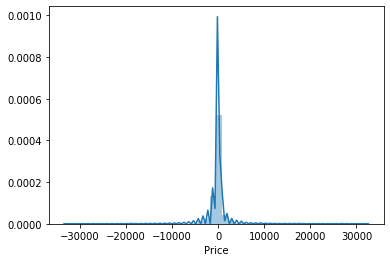

In [63]:
import seaborn as sns
sns.distplot(y_test-y_pred)

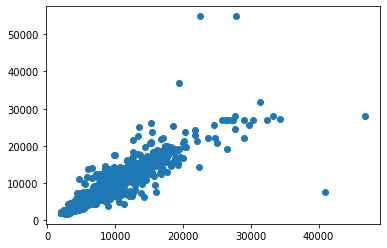

In [65]:
plt.scatter(y_pred,y_test)